In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# MNIST dataset is pre-existing in Keras.
# Importing the MNIST dataset

from tensorflow.keras.datasets import mnist

## <font color="red"> Image Data Pre-processing </font>

In [3]:
# MNIST dataset is already exist in the form of train and test data (60000,10000) respectively
# Have to use tuple unpacking to save the data in the data in the respective train and test datasets

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [4]:
# 60000 images of 28*28 pixels
X_train.shape

(60000, 28, 28)

In [6]:
# Getting single image dimensions
single_img = X_train[0]
single_img.shape

(28, 28)

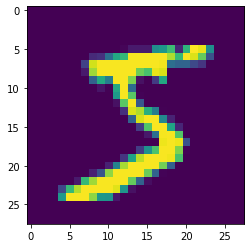

In [7]:
# See single 2D image
plt.imshow(single_img)

In [9]:
# In the MNIST dataset the labels are the numbers they represent
y_train
# We need to change the labels by dummy labels through one hot encoding as it is a multiclass classification problem

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
# "to_categorical" method creates the dummy variables and is the inbuilt method in keras
from tensorflow.keras.utils import to_categorical

In [11]:
# Current shape of y_train
y_train.shape

(60000,)

In [12]:
# Conversion of existing labels into dummy variables for example
y_example = to_categorical(y_train)

In [14]:
y_example.shape

(60000, 10)

In [15]:
# Conversion of existing labels into dummy variables for training as well as test dataset
y_cat_test = to_categorical(y_test, num_classes=10)

In [16]:
y_cat_train = to_categorical(y_train, num_classes=10)

In [17]:
y_cat_train.shape

(60000, 10)

In [18]:
y_cat_test.shape

(10000, 10)

In [19]:
# see single image data
single_img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [20]:
# the values in single image goes between 0-255
# to confirm lets see the max value and min value

single_img.max()

255

In [23]:
single_img.min()

0

In [24]:
# Now we need to do the scaling of the values for the feature data
# and as we already know that the images shall always be channeled between 0-255 range, even for the color images
# so we can divide the feature data by 255 for performing the scaling

X_train = X_train/255

In [25]:
X_test = X_test/255

In [26]:
# Lets see the scaled image now
# the values lies between 0-1 now after the scaling
scaled_img = X_train[0]
scaled_img

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [27]:
scaled_img.max()

1.0

In [29]:
scaled_img.min()

0.0

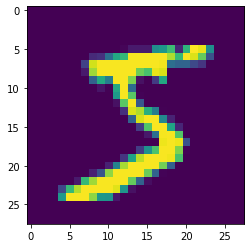

In [30]:
# Image still look the same as the ratio is same for everything
plt.imshow(scaled_img)

In [31]:
# Reshaping the X_train and X_test by adding one more dimension for the color channel
X_train.shape #original shape

(60000, 28, 28)

In [32]:
# Rehshaped in batch size, width, height, color channel
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

## <font color="red"> Creating and Training Model </font>

In [33]:
# Importing the "sequential Layer". Its basiclly required for the Input Layer
from tensorflow.keras.models import Sequential

In [34]:
# Importing "Dense" for the input layers
# Importing "Conv2D" for the Convulational Layers
# Importing "MaxPool2D" for the Pooling Later
# Importing "Flatten" for flattning out the images in to order to feed it to the last dense layer and perform the classifiaction

from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [36]:
model = Sequential()

# First Layer of CNN is "Convulational Layer"

# Generally the "number of Filter" and the "kernel size" is taken in the multiple of 2
# In our case as the MNSIT dataset is not complex we'll take the the-
    # filters as 32
    # Grid/Kernel_size as 4*4
    # Stride as (1,1)
# We'll not be needing any padding as the our image size is 28 and hence when we divide the image size with the grid
# 28/4, we get proper whole integer as 7
# If we would have been getting the value in points then we could have added padding as "same"
# The "same" criteria of padding would have dealt with extra values
# In our case the default "valid" is fine as it doesnt apply padding
# and keeps the image as it is

# "Input_shape" is the shape of the image. In our case its (28,28,1) i.e width, Height, One color Channel

model.add(Conv2D(filters=32, kernel_size=(4,4), strides=(1,1), padding='valid', input_shape=(28,28,1), activation="relu"))


# Second Layer of CNN is "Pool Layer"

# We have taken Pool size as (2,2). It is also the default size.
# In our case it is also the half of the grid size
# We can also add strides and padding in the pool layer as well

model.add(MaxPool2D(pool_size=(2, 2)))


# We can add multiple convulational and pool layers according to the complexity of data


# Third step is to flatten the images


# This means we have to convert the grid of the images into a single array
# i.e. grid of 28*28 has to be converted to array of 784 (28*28=784) in our case

model.add(Flatten())


# Fourth Layer of CNN is "Dense Layer"


# We can add multiple dense layers as per the complexity of the dataset
# Dense layer should generally be equal to flatten array i.e. in our case is 784 (28*28=784)
# But fot now we'll add only one dense layer with 128 neurons

model.add(Dense(128,activation="relu"))


# Fifth Layer of CNN is "Output Layer". It will be a dense layer


# The layer will have one neuron per class for the classification
# That's why In our case it will be 10 neurons in the final layer
# We'll use the softmax function as the activation function as we have multiclass classification problem

model.add(Dense(10, activation="softmax"))


# Final Step is to compile the model
# Loss parameter is generally taken as "categorical_crossentropy" for the classification problem
# optimizer is "adam"
# We can also add metrics. More documentation in relation to metrics can be found at "keras.io/metrics"

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In the above cells there are 2 types of Hyperparameters- Changeable and Un-changeable

#### Un-Changeable

The parameters which are fixed and should be determine on the basis of your dataset are as follows:

1. model.add(Conv2D(filters=32, kernel_size=(4,4), strides=(1,1), padding='valid',<font color="green"> input_shape=(28,28,1) </font>, activation="relu"))

2. <font color="green">model.add(Flatten())</font>

3. <font color="green">model.add(Dense(10, activation="softmax"))</font>

These are all <font color="cyan"> HYPERPARAMETERS</font> based on your data. <font color="cyan">There is correct value for them</font>


#### Changeable

1. <font color="green"> model.add(Conv2D(filters=32, kernel_size=(4,4), strides=(1,1)</font>, padding='valid', input_shape=(28,28,1) , <font color="green">activation="relu"</font>))

2. <font color="green">model.add(Dense(128,activation="relu"))</font>

These are <font color="cyan"> HYPERPARAMETERS you can experiment with</font>

In [37]:
# Training the Model with "early stopping call back" so that we dont have to choose the number of epochs

from tensorflow.keras.callbacks import EarlyStopping

In [38]:
# making the instance of "EarlyStopping"

# By default the monitor value is "Validation loss", we can also take the monitor value as "validation accuracy" 
# as we have given the metrics as "accuracy" during the model compilation

# Setting patience as 1. It will wait for 1 epoch to go up from the lowest validation loss level and
# then will stop the model

early_stop = EarlyStopping(monitor="val_loss", patience=1)

In [39]:
# Training the model

model.fit(X_train,y_cat_train, epochs = 10, 
          validation_data = (X_test, y_cat_test),
          callbacks = [early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 35s 578us/sample - loss: 0.1408 - accuracy: 0.9581 - val_loss: 0.0630 - val_accuracy: 0.9792
Epoch 2/10
60000/60000 [==============================] - 33s 549us/sample - loss: 0.0495 - accuracy: 0.9850 - val_loss: 0.0448 - val_accuracy: 0.9855
Epoch 3/10
60000/60000 [==============================] - 33s 550us/sample - loss: 0.0324 - accuracy: 0.9901 - val_loss: 0.0538 - val_accuracy: 0.9828


## <font color="red"> Evaluating the Model </font>

In [40]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.140794,0.958133,0.062988,0.9792
1,0.049498,0.985017,0.044777,0.9855
2,0.032387,0.990083,0.053762,0.9828


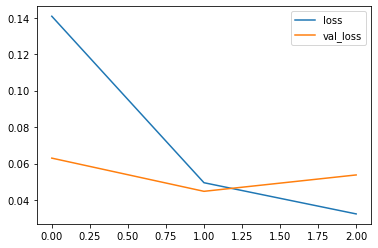

In [41]:
metrics[["loss","val_loss"]].plot()

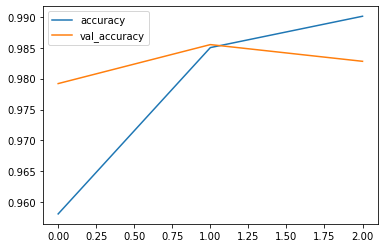

In [42]:
metrics[["accuracy","val_accuracy"]].plot()

In [43]:
# To know metrices available in the model

model.metrics_names

['loss', 'accuracy']

In [44]:
# Evaluating the model for the validation test

# First index in the list will be loss and the second index will be the accuracy of the validation test

model.evaluate(X_test, y_cat_test, verbose = 0)

[0.053761846075067295, 0.9828]

In [45]:
# Getting the predictions

from sklearn.metrics import classification_report, confusion_matrix

In [46]:
# "Predict_classes" will be used in our case as this is the multi classification problem
predictions = model.predict_classes(X_test)

In [47]:
y_cat_test.shape

(10000, 10)

In [48]:
# we need to compare the predictions of the model to the actual labels
# i.e. instead of "y_cat_test", we'll compare it to y_test
# We dont have any longer need to use the classification ones as the model is already made

y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [49]:
# Comparing the true "y_test" values with our predicted values "predictions = model.predict_classes(X_test)"

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.98      0.99      0.98       958
           7       0.99      0.99      0.99      1028
           8       0.95      0.99      0.97       974
           9       1.00      0.92      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [50]:
confusion_matrix(y_test, predictions)

array([[ 968,    0,    3,    1,    0,    0,    4,    0,    4,    0],
       [   1, 1125,    4,    0,    0,    0,    4,    0,    1,    0],
       [   0,    1, 1025,    0,    0,    0,    1,    3,    2,    0],
       [   0,    0,    1, 1004,    0,    1,    0,    1,    3,    0],
       [   0,    0,    2,    0,  971,    0,    3,    0,    3,    3],
       [   1,    0,    0,   13,    0,  870,    5,    0,    3,    0],
       [   3,    1,    0,    0,    1,    1,  948,    0,    4,    0],
       [   1,    2,    7,    0,    0,    0,    0, 1017,    1,    0],
       [   1,    0,    3,    0,    0,    0,    2,    1,  967,    0],
       [   3,    2,    2,   17,    8,   10,    1,    8,   25,  933]],
      dtype=int64)

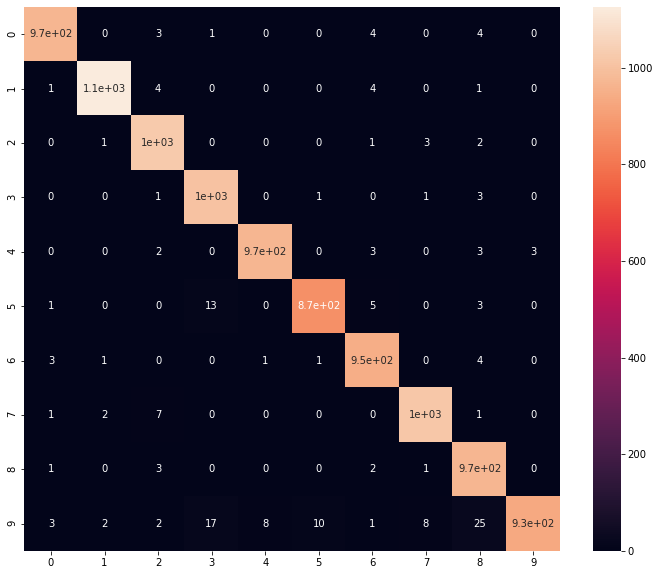

In [51]:
# To visualize the confusion matrix

import seaborn as sns

plt.figure(figsize=(12,10))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

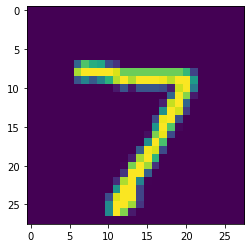

In [53]:
# Checking the predictions with the images

# Number will only be visible after reshaping it and removing the color channel parameter (28,28,"1")

my_number = X_test[0]

plt.imshow(my_number.reshape(28,28))

In [54]:
# Converting the image in the below written shape
# number of images, width, height, color channels
# feeding it into the model

model.predict_classes(my_number.reshape(1,28,28,1))

array([7], dtype=int64)

In [55]:
# Predicted the number as 7. Hence the model is successful

## <font color="red"> Trying the Model on External Images </font>

### 1. Trying model on External Images with big sizes than 28*28

In [59]:
from PIL import Image

In [318]:
# img = img.imresize(img,(28,28))
img = Image.open(r"C:\Users\iprak\Desktop\exam.png")
# convert the image to grayscale
img = img.convert(mode='L')

# Saving new image
img.save(r'C:\Users\iprak\Desktop\grayscale_converted.jpg')


In [319]:
# Loading Grayscale Image
img_conv = Image.open(r"C:\Users\iprak\Desktop\grayscale_converted.jpg")

# report the size of the image
print(img_conv.size)

(600, 600)


In [320]:
# resize image and ignore original aspect ratio
img_resized = img_conv.resize((28,28))

# report the size of the thumbnail
print(img_resized.size)

# Saving new image
img_resized.save(r'C:\Users\iprak\Desktop\grayscale_converted_compressed.jpg')

(28, 28)


In [321]:
# Loading Compressed Image
img_example = Image.open(r"C:\Users\iprak\Desktop\grayscale_converted_compressed.jpg")

In [322]:
# convert image to numpy array
data_example = np.asarray(img_example)
data_example.shape

(28, 28)

In [323]:
# Reshaping image as taken by the model
data_reshape_example = data_example.reshape(1,28,28,1)

# To see new shape
data_reshape_example.shape

(1, 28, 28, 1)

In [324]:
# Predicting the number
model.predict_classes(data_reshape_example)

array([9], dtype=int64)

In [326]:
# Saving the model
model.save('CNN_on_MNIST.h5')

### 2. Trying model on images with the size of 28*28

(28, 28)


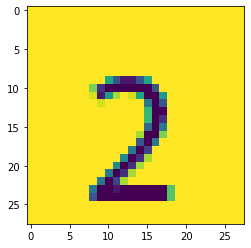

In [190]:
# Reading Image

a = plt.imread(r"C:\Users\iprak\Desktop\Two_1.png")
print(a.shape)
plt.imshow(a)

In [191]:
# Converting image into a numpy array
a_a = np.asarray(a)

# reshaping image as taken by the model
a_b = two_a.reshape(1,28,28,1)
print(a_b.shape)

# Predicting the number
model.predict_classes(a_b)

(1, 28, 28, 1)


array([2], dtype=int64)

### <font color="Magenta">Note: The model is working on external pictures. But Not Perfect</font>